<a href="https://colab.research.google.com/github/Victorlouisdg/simulators/blob/main/fluid_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the grid

<img src="https://i.imgur.com/3FlzvX5.png" width=500 />

In [2]:
n = amount_of_cells = 32
velocity_grid = np.zeros((n, n, 2))
cell_size = 1.0 / n
dt = 0.01

In [3]:
def get_cell_center(i, j):
    return (i * cell_size, j * cell_size)

get_cell_center(1, 2)

(0.03125, 0.0625)

In [4]:
def get_float_cell_index(x, y):
    return (x / cell_size, y / cell_size)

get_float_cell_index(1/2 * cell_size, cell_size)

(0.5, 1.0)

# Bilinear interpolation

Bilinear interpolation is a way to interpolate the value at in point in 2D from 4 other points.

I find the simplest way to understand it with a color-coded image:


<img src="https://i.imgur.com/tfiWC5f.png" width=500 />

Here the contribution of the yellow point's value to the pink point, is proportional to the yellow area.
This makes intuiive sense because the closer the pink point is to the yellow point, the larger yellow area becomes.

In [5]:
def bilinear_interpolate(grid, i_float, j_float):
    i = int(np.floor(i_float))
    j = int(np.floor(j_float))

    a = i_fractional_part = i_float - i
    b = j_fractional_part = j_float - j

    red = a * b
    green = a * (1 - b)
    blue = (1 - a) * b
    yellow = (1 - a) * (1 - b)

    # When a value is OOB, use the value inside instead
    i = max(i, 0)
    i_1 = min(i + 1, grid.shape[0] - 1)
    j = max(j, 0)
    j_1 = min(j+ 1, grid.shape[1] - 1)

    return yellow * grid[i, j] + \
           green * grid[i_1, j] + \
           blue * grid[i, j_1] + \
           red * grid[i_1, j_1]

In [6]:
mini_grid = np.array([[1, 0.5], [0, 1]])
print(mini_grid)

[[1.  0.5]
 [0.  1. ]]


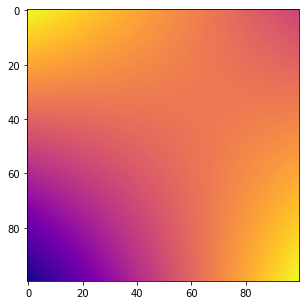

In [7]:
steps = 100
step_size = 1.0 / (steps - 1)
grid_interpolated = np.zeros((steps, steps))

for k in range(steps):
    for l in range(steps):
        grid_interpolated[k, l] = bilinear_interpolate(mini_grid, k * step_size, l * step_size)

fig = plt.figure(figsize=(5, 5))
plt.imshow(grid_interpolated,  cmap=plt.get_cmap("plasma"));

# Diffusion
Diffusion in balance when a cell is the average of it's neighbors.

(Laplacian = sum of second order derivatives)

One way to implement this:

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSu3WvQYcbjMTdkvVfeZiTUaDB0NLW0LqtVaQ&usqp=CAU" />



In [8]:
def laplacian(grid, i, j):
    value_center = -4 * grid[i, j]
    value_left = grid[i, max(j - 1, 0)]
    value_right = grid[i, min(j + 1, grid.shape[1] - 1)]
    value_above = grid[max(i - 1, 0), j]
    value_below = grid[max(i + 1, grid.shape[0]), j]

    return value_center + value_left + value_right + value_above + value_below